I used three different regressors:<br>
KNeighborsRegressor<br>
RandomForestRegressor<br>
MLPRegressor<br>

In [1]:
import os
from joblib import load
import utils
import data_tools

seed = 1528
path2data = os.path.join('..', 'data', 'winequality-white.csv')

# Load trained models
knn = load(os.path.join('..', 'models', 'knn.joblib'))
rf = load(os.path.join('..', 'models', 'rf.joblib'))
mlp = load(os.path.join('..', 'models', 'mlp.joblib'))


Test
MAE: 0.604710
Weighted MAE: 1.1020
Balanced accuracy score: 0.2676
Confusion matrix:
 [[  0   3   1   2   0   0   0]
 [  0  10  23  11   2   0   0]
 [  0  11 184 138  18   2   0]
 [  0   8 127 288  99  14   1]
 [  0   1  21  80  92  13   0]
 [  0   0   2  16  15   6   0]
 [  0   0   0   0   1   0   0]]


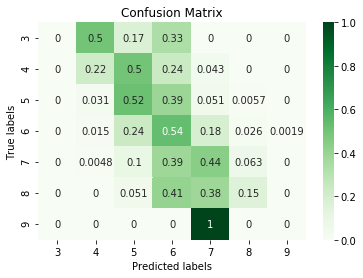

In [2]:
# Results for knn
data =  data_tools.Data(path2data, seed, drop_features=['citric acid'])
data.scale()
x_train, y_train, x_test, y_test = data.get_train_test()
y_pred = knn.predict(x_test)
utils.print_metrics("Test", y_test, y_pred, data.classes, data.class_weights, draw_conf_matrix=True)


Test
MAE: 0.575876
Weighted MAE: 1.3220
Balanced accuracy score: 0.2226
Confusion matrix:
 [[  0   0   2   3   1   0   0]
 [  0   0  31  14   1   0   0]
 [  0   1 132 213   7   0   0]
 [  0   1  60 405  71   0   0]
 [  0   0   6 112  89   0   0]
 [  0   0   1  14  24   0   0]
 [  0   0   0   0   1   0   0]]


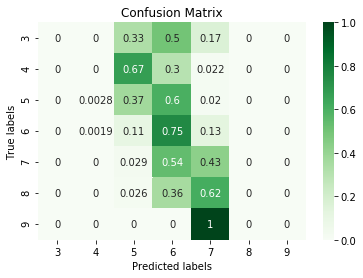

In [3]:
# Results for mlp
data =  data_tools.Data(path2data, seed)
data.scale()
x_train, y_train, x_test, y_test = data.get_train_test()
y_pred = mlp.predict(x_test)
utils.print_metrics("Test", y_test, y_pred, data.classes, data.class_weights, draw_conf_matrix=True)


Test
MAE: 0.551790
Weighted MAE: 1.2890
Balanced accuracy score: 0.2438
Confusion matrix:
 [[  0   0   2   4   0   0   0]
 [  0   2  28  16   0   0   0]
 [  0   2 187 158   6   0   0]
 [  0   0  91 388  58   0   0]
 [  0   0   7 115  85   0   0]
 [  0   0   0  18  21   0   0]
 [  0   0   0   0   1   0   0]]


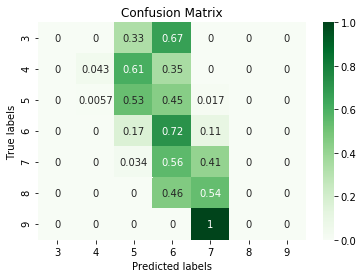

In [4]:
# Results for random forest
data =  data_tools.Data(path2data, seed)
x_train, y_train, x_test, y_test = data.get_train_test()
y_pred = rf.predict(x_test)
utils.print_metrics("Test", y_test, y_pred, data.classes, data.class_weights, draw_conf_matrix=True)

Comparison MAE and confusion matrix shows that this metric is not appropriate for tasks with imbalanced data.<br>
KNeighborsRegressor gives the best result in both metrics - weighted_mae and balanced_accuracy.<br>
Perhaps the result for mlp can be improved by replacing mse with a weighted loss function.<br>
Even the best model is wrong by 1-2 points which suggests that the available features are not enough to solve this problem.<br>
Perhaps the accuracy of the models can be improved using approaches such as under-sampling and over-sampling.